FIXED EDA VISUALIZATIONS - STEP 4
✅ Preprocessed data loaded successfully
📊 Dataset shape: (303, 31)

🚀 RUNNING FIXED EDA ANALYSIS...

RUNNING DISTRIBUTION ANALYSIS

FIXED DISTRIBUTION ANALYSIS

📊 Analyzing 5 key numerical variables:

🔍 Analyzing age...


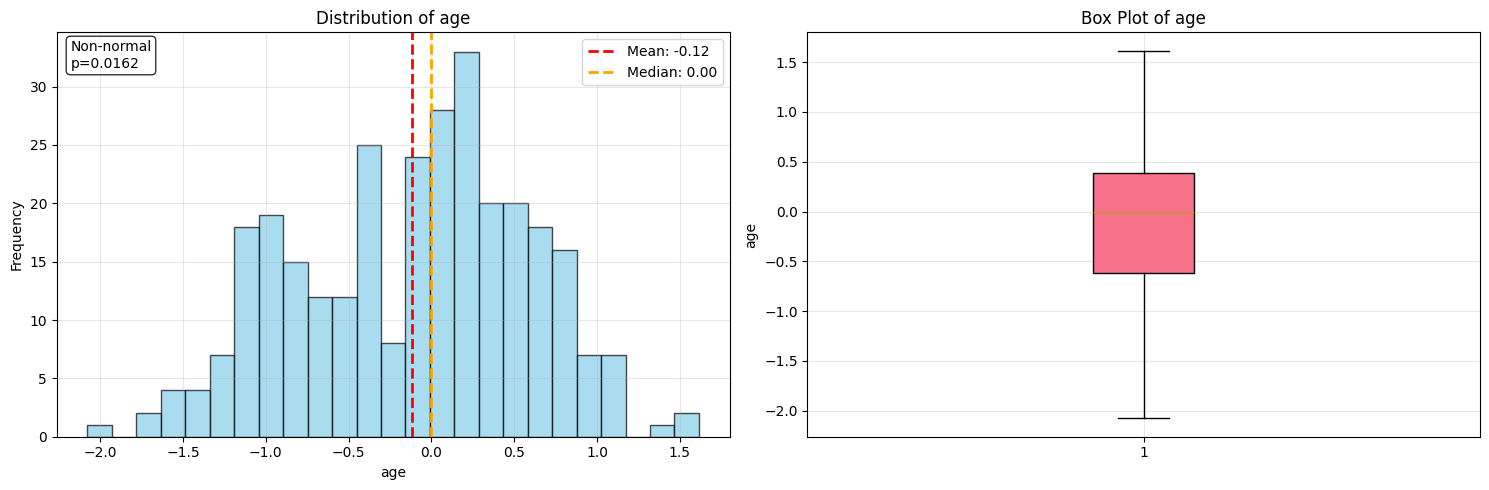

   • Mean: -0.12
   • Median: 0.00
   • Std: 0.70
   • Distribution: ❌ Non-normal (p=0.0162)

🔍 Analyzing trestbps...


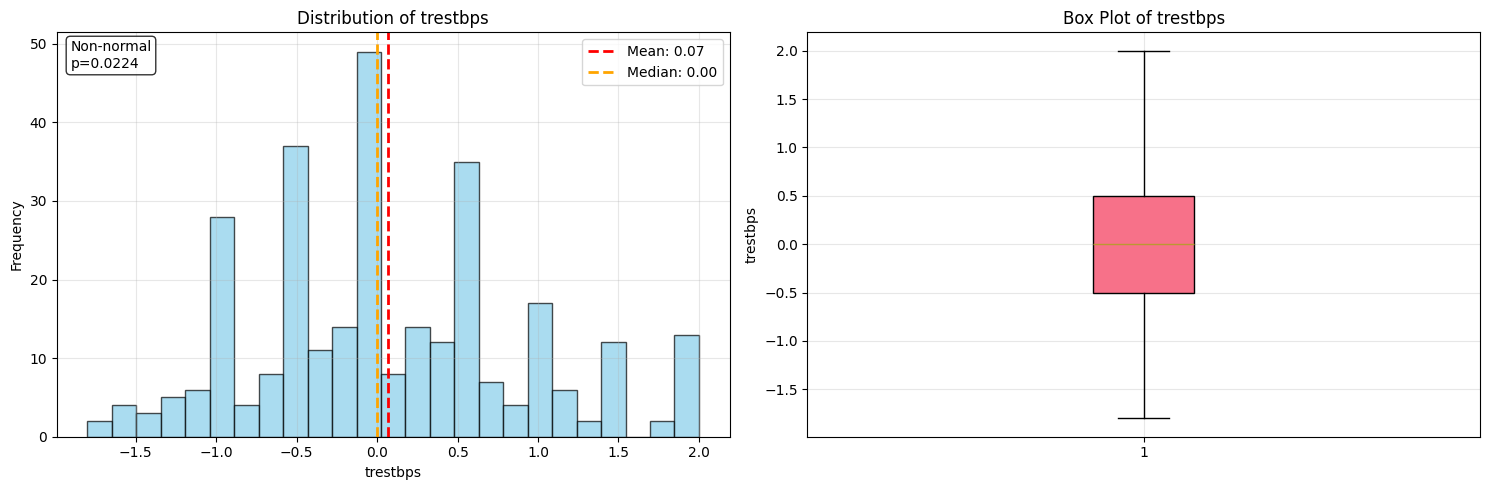

   • Mean: 0.07
   • Median: 0.00
   • Std: 0.83
   • Distribution: ❌ Non-normal (p=0.0224)

🔍 Analyzing chol...


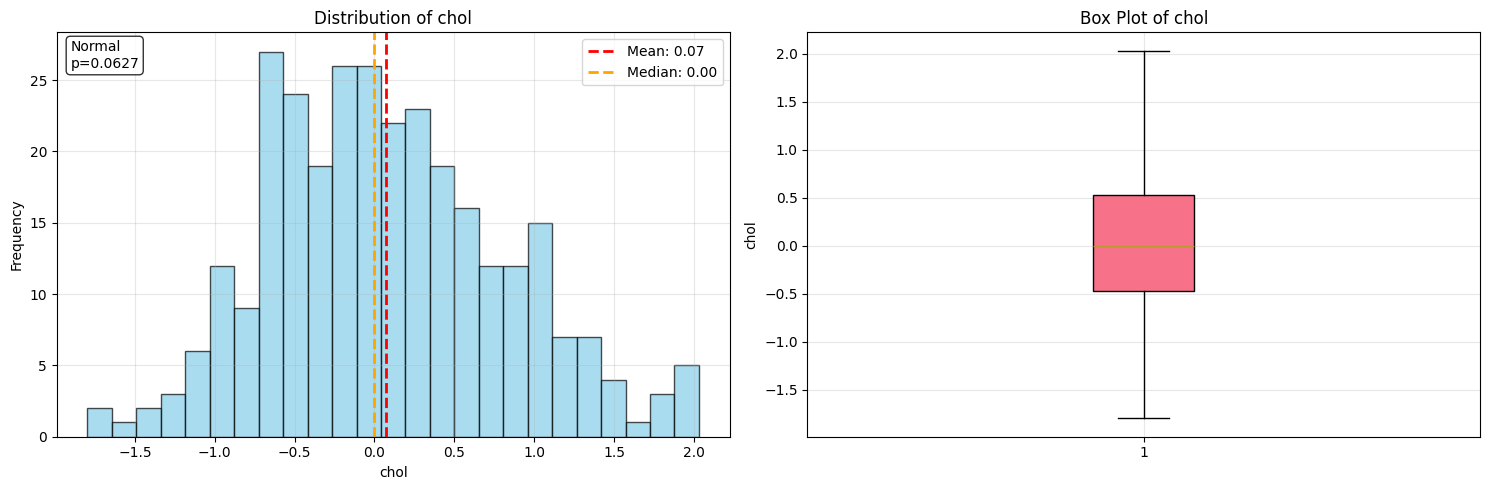

   • Mean: 0.07
   • Median: 0.00
   • Std: 0.74
   • Distribution: ✅ Normal (p=0.0627)

🔍 Analyzing thalach...


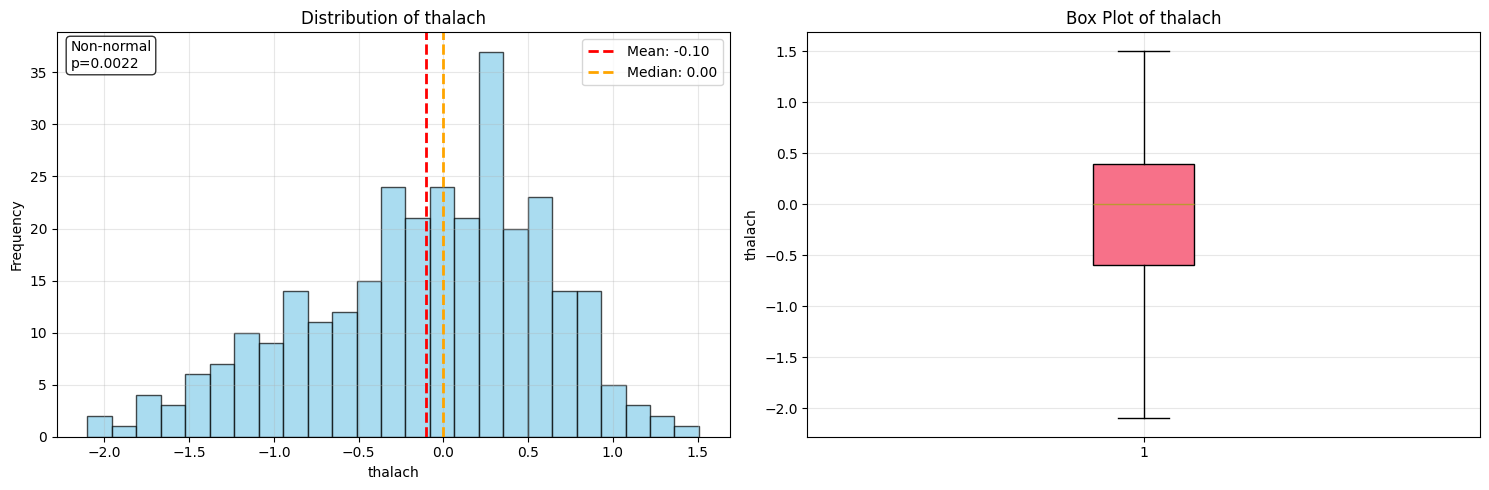

   • Mean: -0.10
   • Median: 0.00
   • Std: 0.70
   • Distribution: ❌ Non-normal (p=0.0022)

🔍 Analyzing oldpeak...


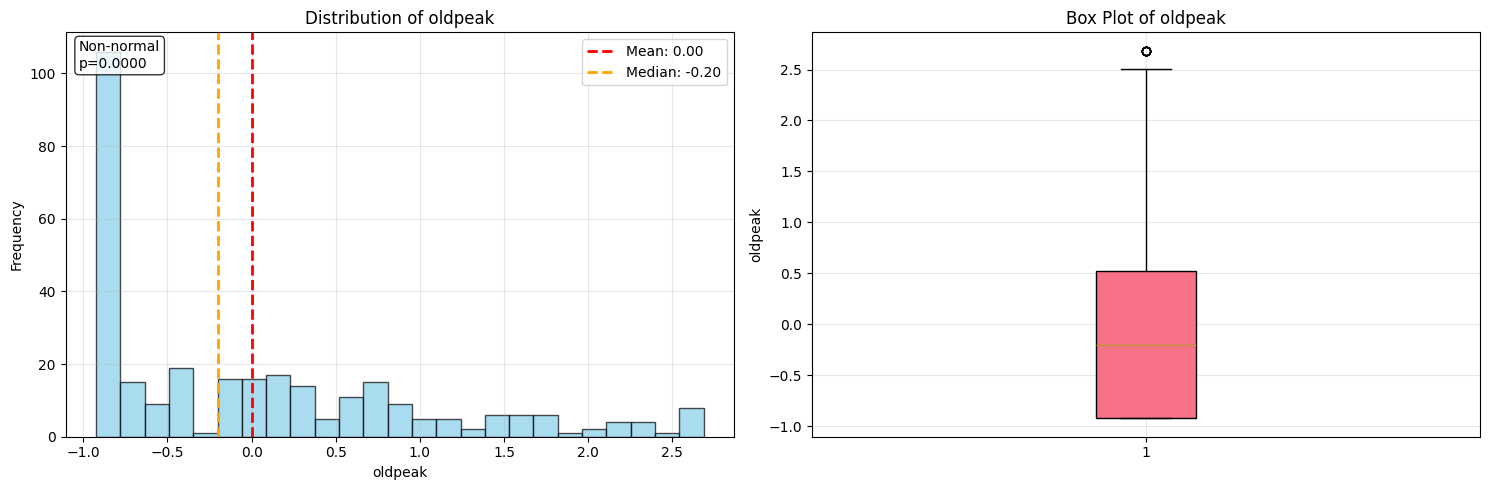

   • Mean: 0.00
   • Median: -0.20
   • Std: 1.00
   • Distribution: ❌ Non-normal (p=0.0000)

RUNNING CATEGORICAL ANALYSIS

FIXED CATEGORICAL ANALYSIS

🔍 Analyzing sex vs Heart Disease...


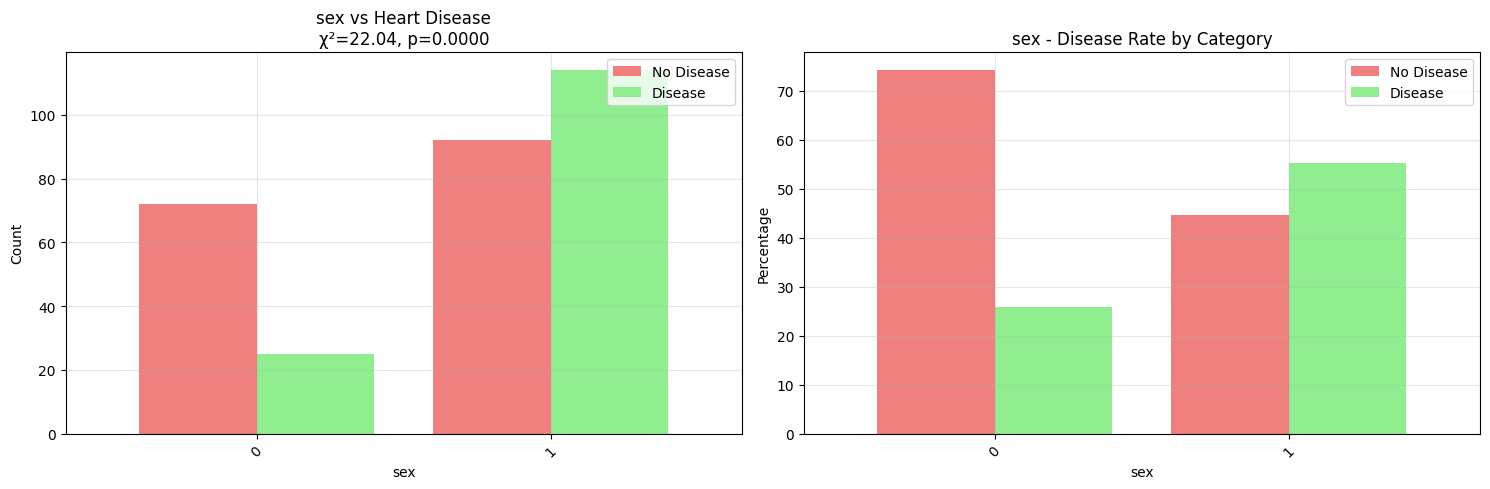

   • Association with heart disease: ✅ Significant
   • Chi-square: 22.04
   • P-value: 0.0000

🔍 Analyzing cp vs Heart Disease...


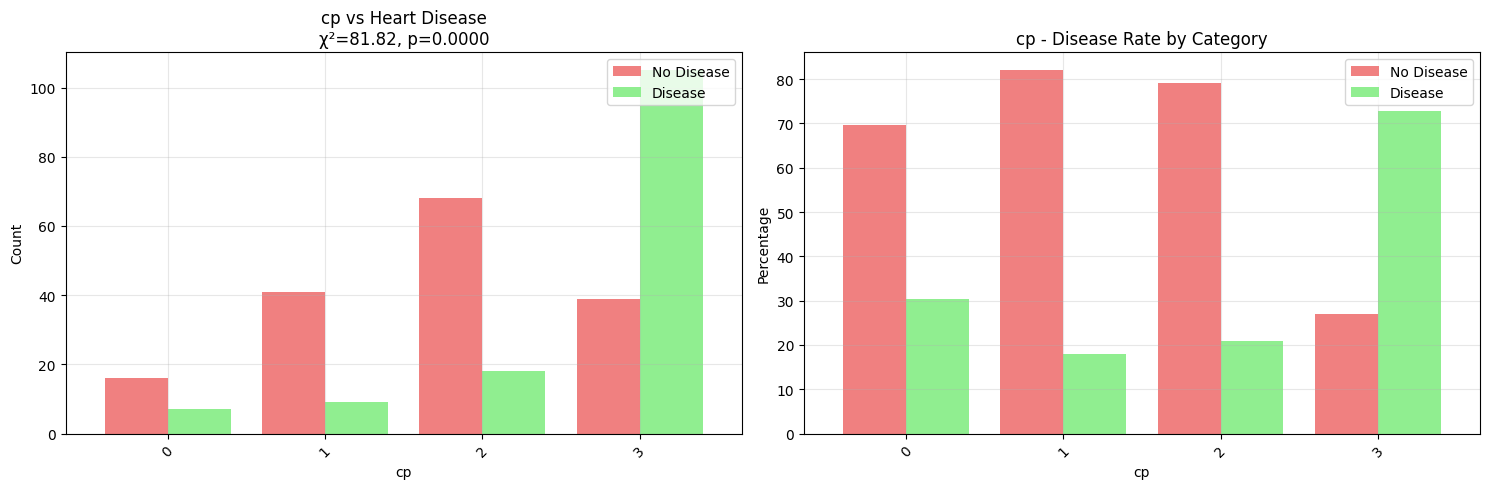

   • Association with heart disease: ✅ Significant
   • Chi-square: 81.82
   • P-value: 0.0000

🔍 Analyzing fbs vs Heart Disease...


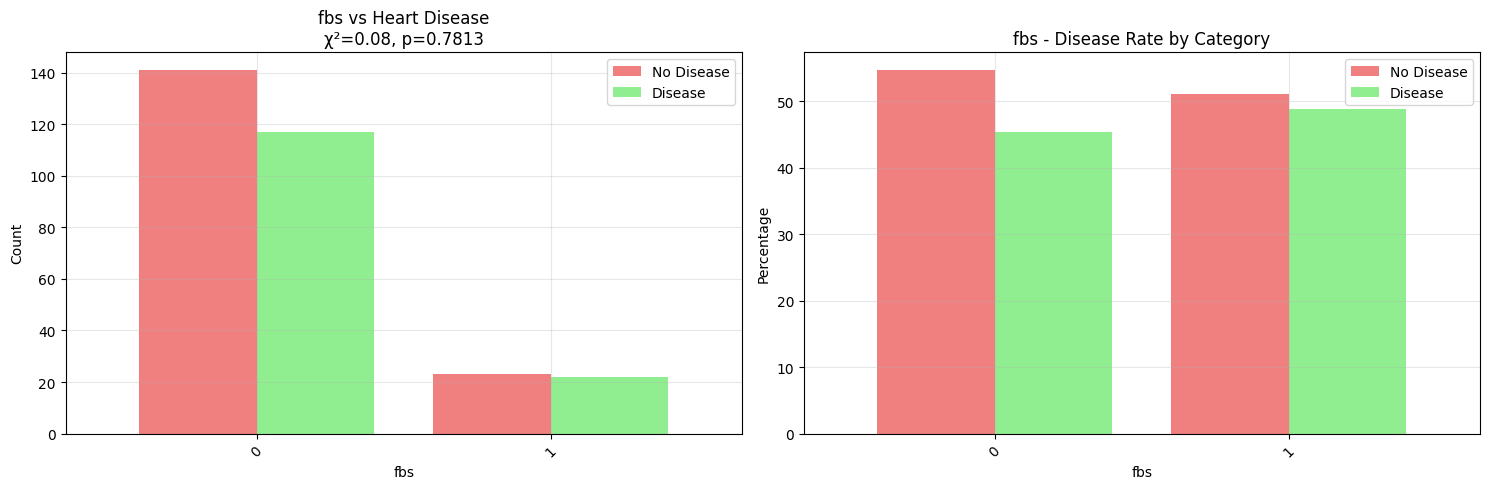

   • Association with heart disease: ❌ Not significant
   • Chi-square: 0.08
   • P-value: 0.7813

🔍 Analyzing restecg vs Heart Disease...


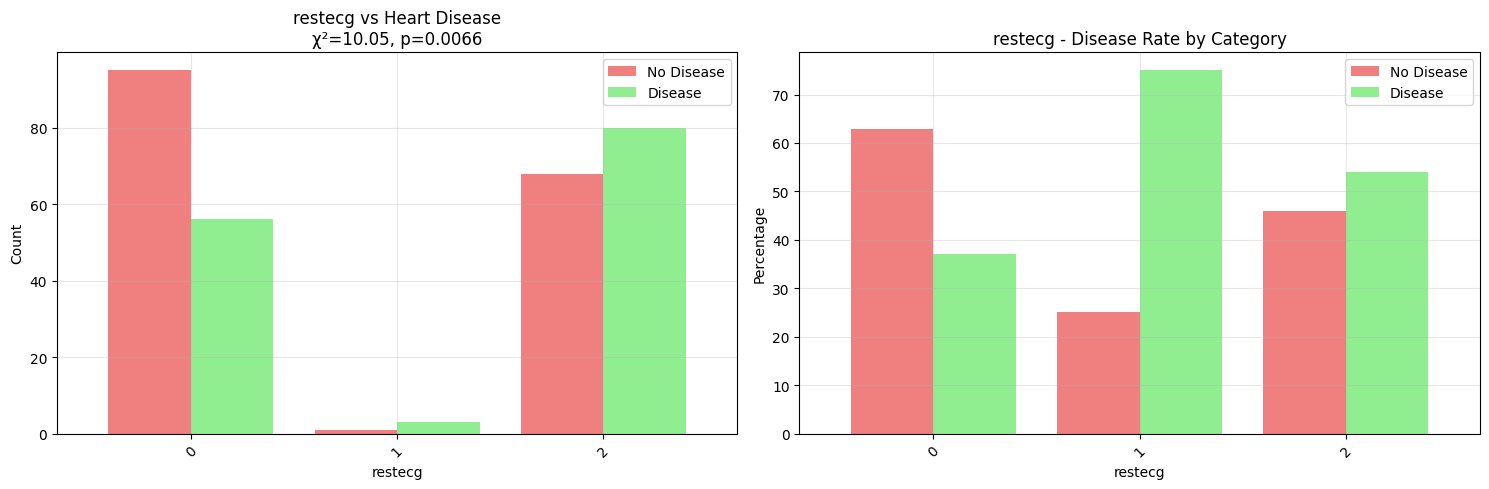

   • Association with heart disease: ✅ Significant
   • Chi-square: 10.05
   • P-value: 0.0066

🔍 Analyzing exang vs Heart Disease...


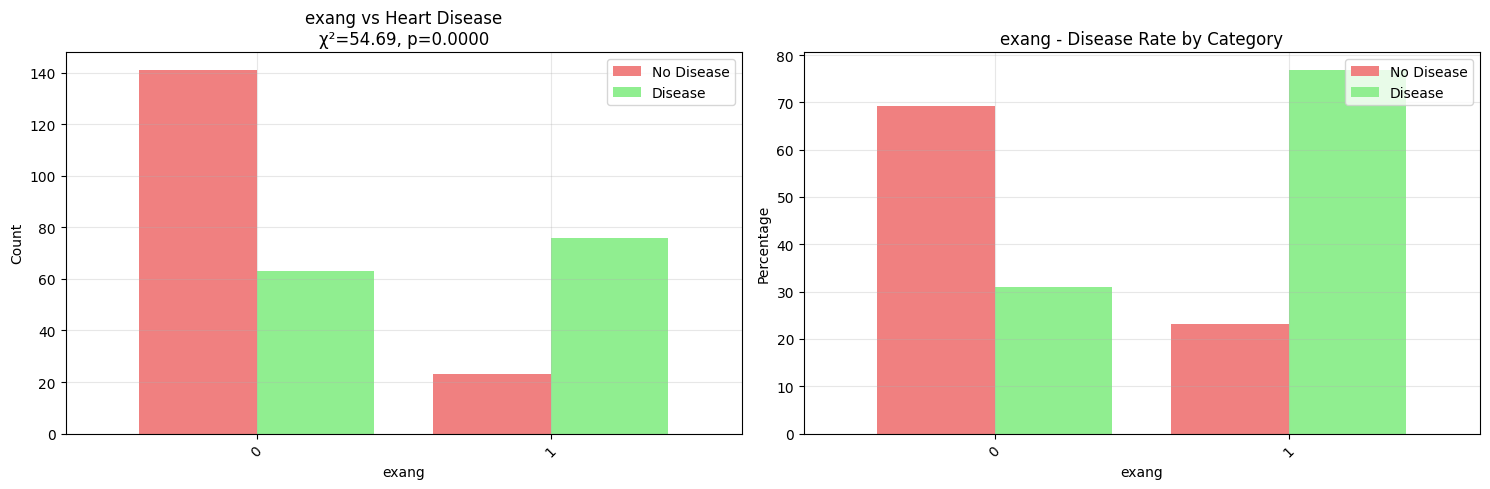

   • Association with heart disease: ✅ Significant
   • Chi-square: 54.69
   • P-value: 0.0000

RUNNING CORRELATION ANALYSIS

FIXED CORRELATION ANALYSIS
📊 Analyzing correlations for 18 numerical variables


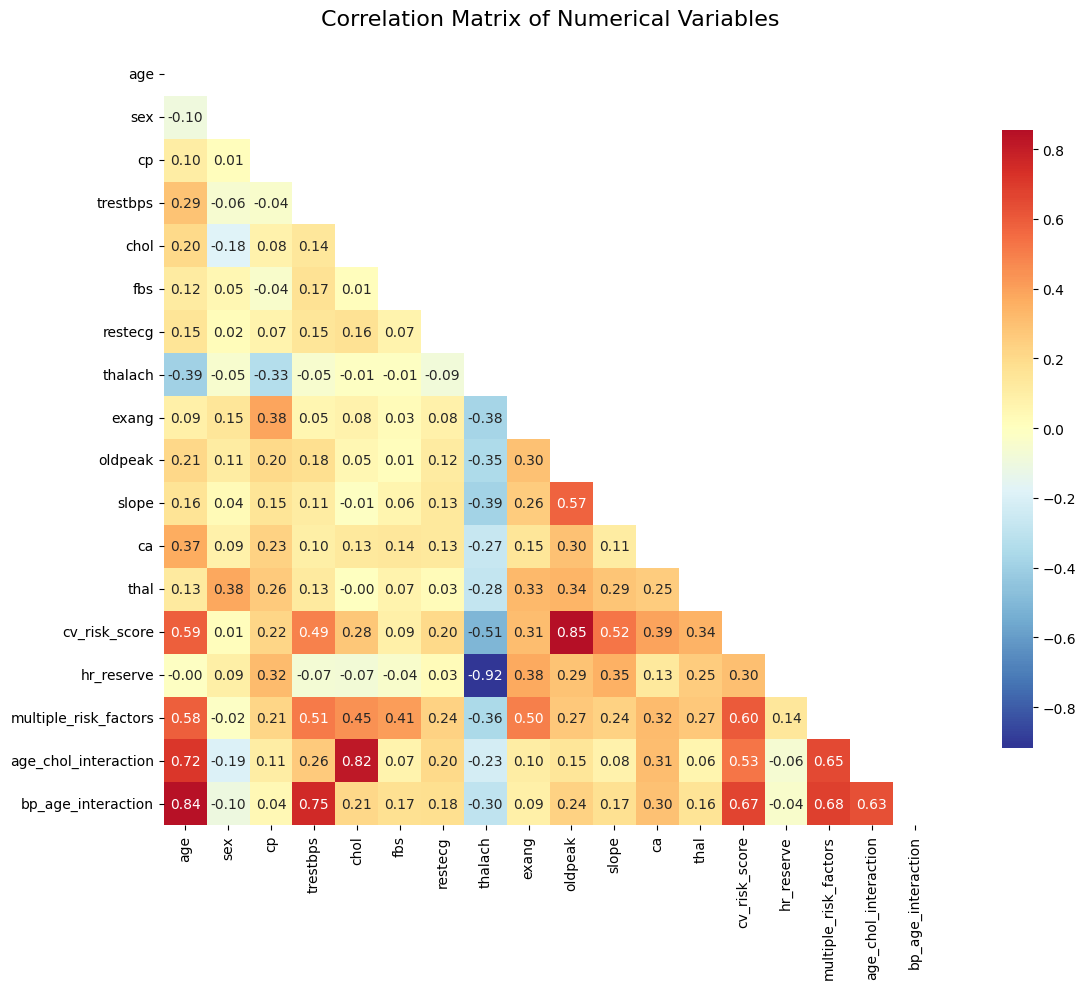

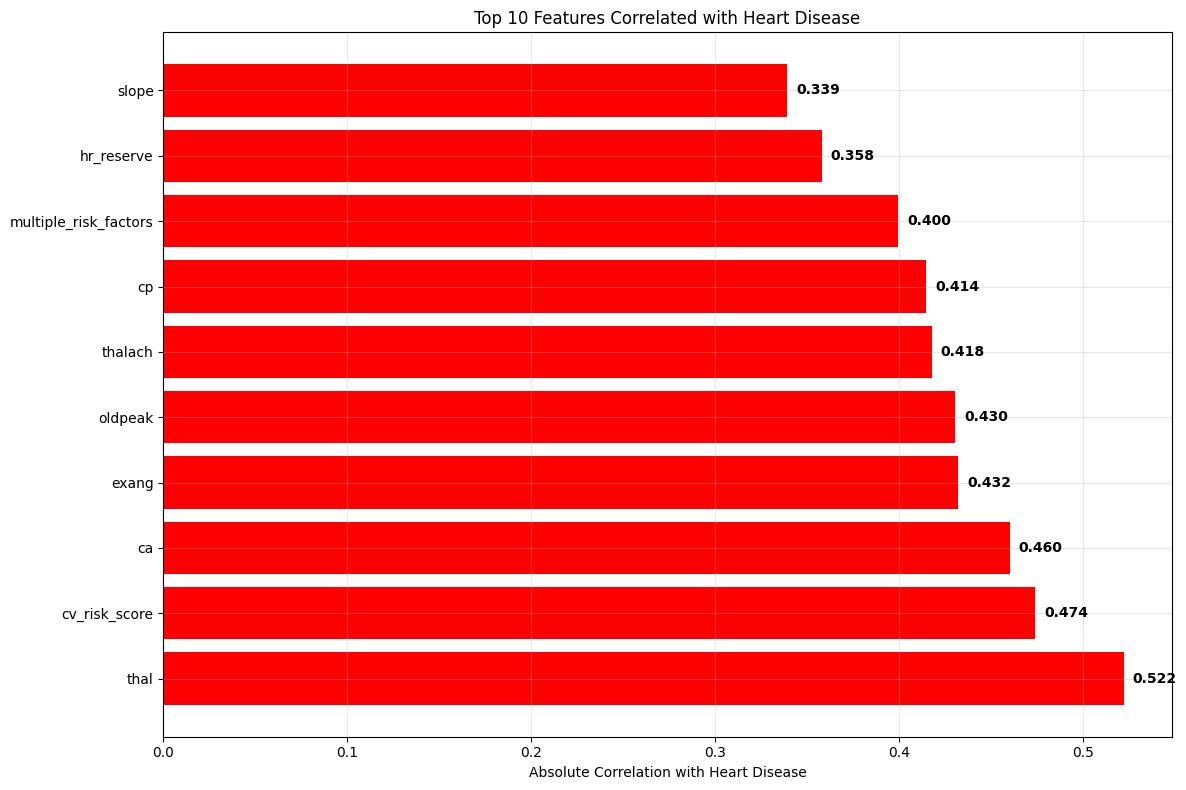


🎯 TOP 5 FEATURES CORRELATED WITH HEART DISEASE:
   1. thal: 0.522
   2. cv_risk_score: 0.474
   3. ca: 0.460
   4. exang: 0.432
   5. oldpeak: 0.430

RUNNING GROUP COMPARISON

FIXED GROUP COMPARISON ANALYSIS
📊 Sample sizes: Healthy=164, Disease=139

🔍 Comparing age between groups...


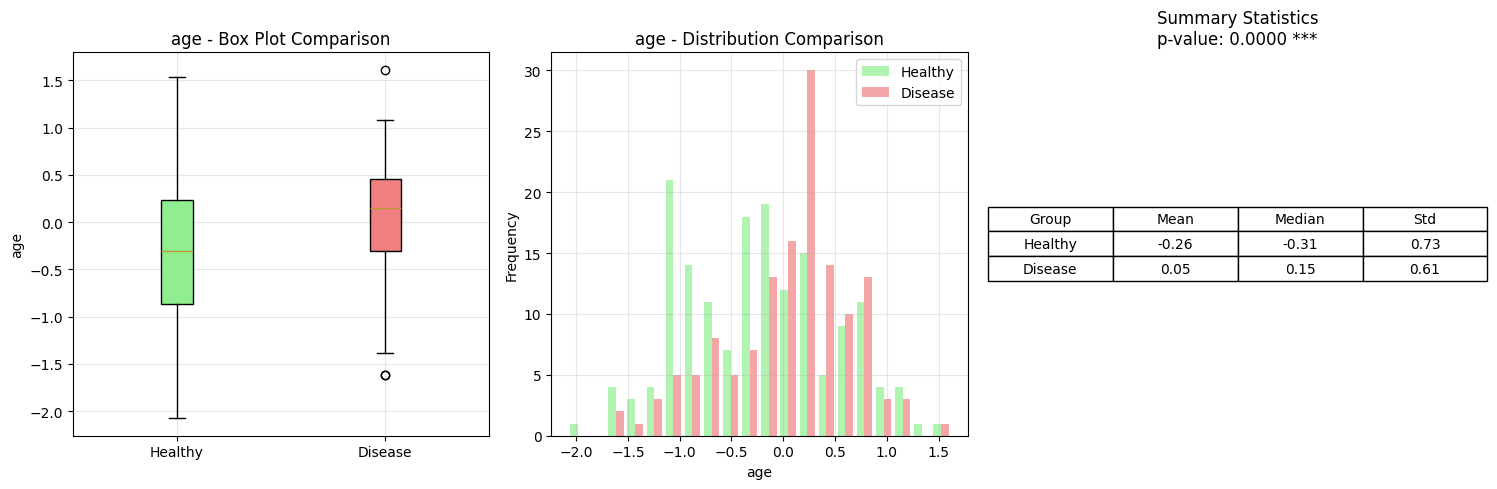

   • ✅ Significant difference
   • Healthy mean: -0.26
   • Disease mean: 0.05
   • P-value: 0.0000

🔍 Comparing trestbps between groups...


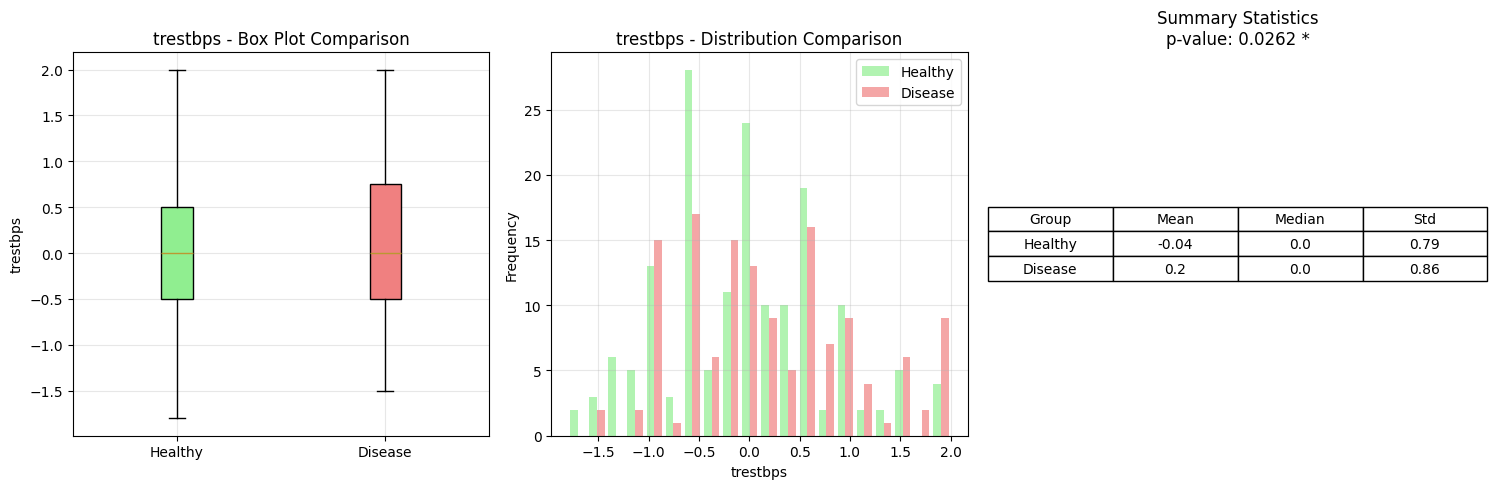

   • ✅ Significant difference
   • Healthy mean: -0.04
   • Disease mean: 0.20
   • P-value: 0.0262

🔍 Comparing chol between groups...


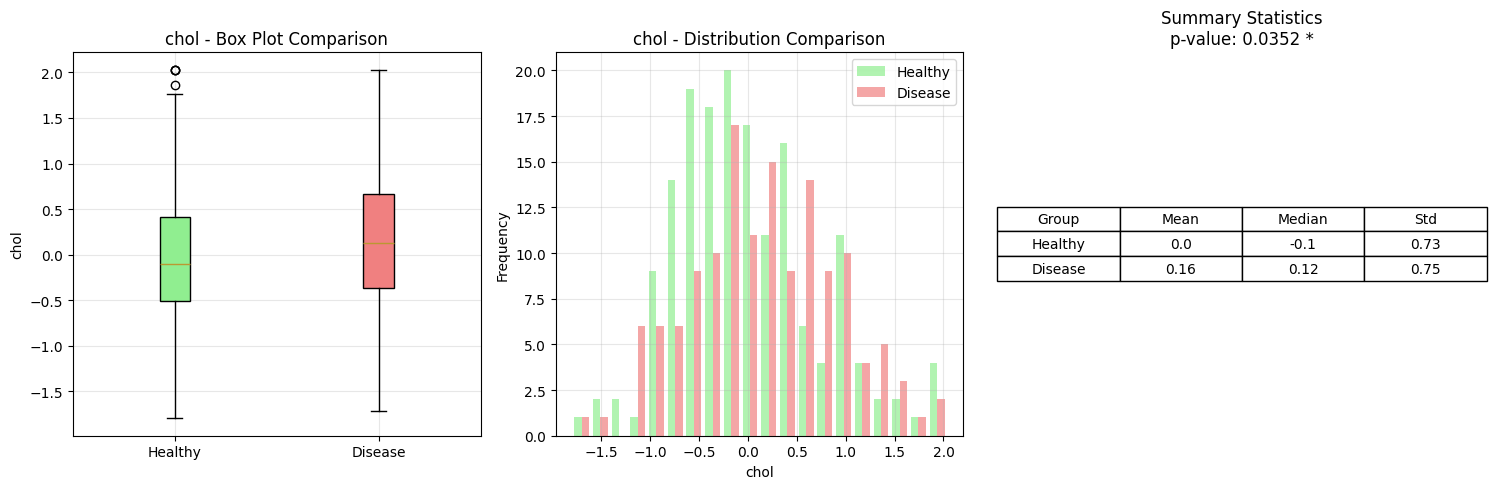

   • ✅ Significant difference
   • Healthy mean: 0.00
   • Disease mean: 0.16
   • P-value: 0.0352

🔍 Comparing thalach between groups...


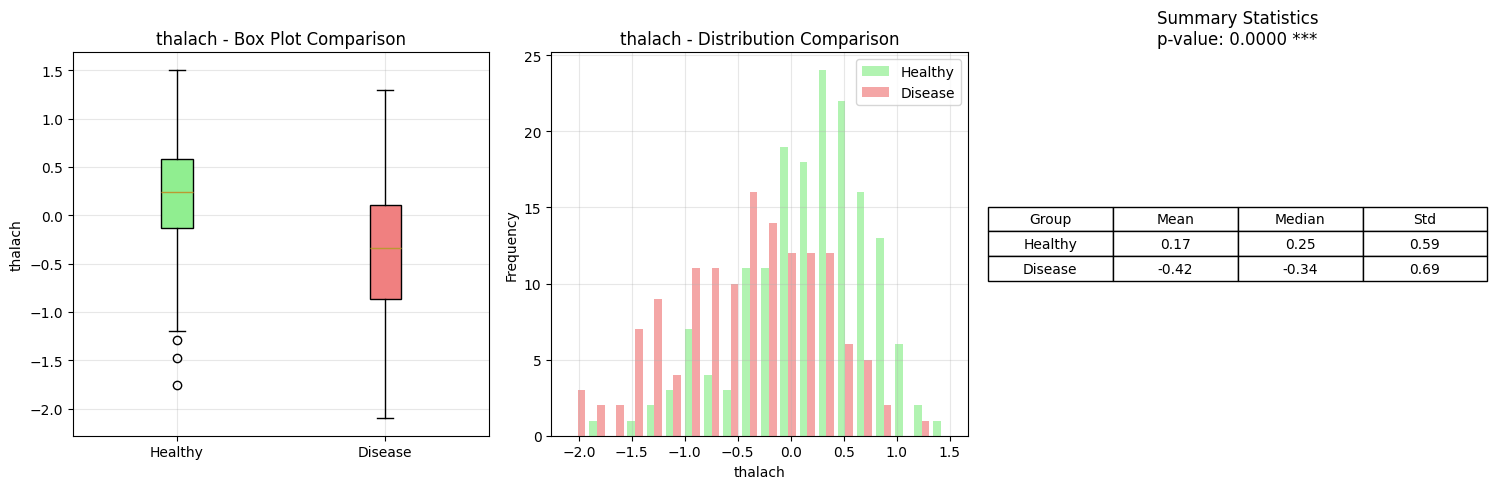

   • ✅ Significant difference
   • Healthy mean: 0.17
   • Disease mean: -0.42
   • P-value: 0.0000

FIXED EDA ANALYSIS COMPLETED SUCCESSFULLY!

📊 ANALYSIS SUMMARY:
   • Distribution analysis: 5 variables
   • Categorical analysis: 5 variables
   • Correlation analysis: Completed
   • Group comparisons: 4 variables

🔍 KEY FINDINGS:
   • Normal distributions: 1 out of 5
   • Significant categorical associations: 4 out of 5
   • Significant group differences: 4 out of 4
   • Strongest predictor: thal (correlation: 0.522)

✅ All visualizations should now display properly!
📋 Ready to proceed to Step 5 - Machine Learning


In [2]:
# Fixed EDA Visualizations - Heart Disease Analysis
# Solution for Step 4 visualization issues

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.style.use('default')  # Use default style for better compatibility
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("=" * 60)
print("FIXED EDA VISUALIZATIONS - STEP 4")
print("=" * 60)

# Load preprocessed data
try:
    df = pd.read_csv('heart_disease_preprocessed.csv')
    print("✅ Preprocessed data loaded successfully")
    print(f"📊 Dataset shape: {df.shape}")
except:
    print("❌ Error: Please run Step 3 first to create preprocessed data")
    exit()

# ==============================================================================
# FIXED PART 1: DISTRIBUTION ANALYSIS WITH WORKING VISUALIZATIONS
# ==============================================================================

def fixed_distribution_analysis(df):
    """
    Fixed distribution analysis with properly working visualizations
    """
    print("\n" + "=" * 50)
    print("FIXED DISTRIBUTION ANALYSIS")
    print("=" * 50)
    
    # Identify numerical columns (limit to key ones for better visualization)
    key_numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    available_cols = [col for col in key_numerical_cols if col in df.columns]
    
    print(f"\n📊 Analyzing {len(available_cols)} key numerical variables:")
    
    # Create individual plots for each variable (better than subplots)
    normality_results = {}
    
    for col in available_cols:
        print(f"\n🔍 Analyzing {col}...")
        
        # Create individual figure for each variable
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Histogram
        ax1.hist(df[col], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        ax1.axvline(df[col].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
        ax1.set_title(f'Distribution of {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Frequency')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Box plot
        ax2.boxplot(df[col], patch_artist=True)
        ax2.set_title(f'Box Plot of {col}')
        ax2.set_ylabel(col)
        ax2.grid(True, alpha=0.3)
        
        # Normality test
        if len(df[col].dropna()) > 3:
            try:
                stat, p_value = stats.normaltest(df[col].dropna())
                normality_results[col] = {'statistic': stat, 'p_value': p_value, 'normal': p_value > 0.05}
                
                # Add normality info to histogram
                normal_text = "Normal" if p_value > 0.05 else "Non-normal"
                ax1.text(0.02, 0.98, f'{normal_text}\np={p_value:.4f}', 
                        transform=ax1.transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            except:
                normality_results[col] = {'statistic': 0, 'p_value': 1, 'normal': False}
        
        plt.tight_layout()
        plt.show()
        
        # Print individual statistics
        print(f"   • Mean: {df[col].mean():.2f}")
        print(f"   • Median: {df[col].median():.2f}")
        print(f"   • Std: {df[col].std():.2f}")
        if col in normality_results:
            status = "✅ Normal" if normality_results[col]['normal'] else "❌ Non-normal"
            print(f"   • Distribution: {status} (p={normality_results[col]['p_value']:.4f})")
    
    return normality_results

# ==============================================================================
# FIXED PART 2: CATEGORICAL ANALYSIS WITH WORKING VISUALIZATIONS
# ==============================================================================

def fixed_categorical_analysis(df):
    """
    Fixed categorical analysis with properly working visualizations
    """
    print("\n" + "=" * 50)
    print("FIXED CATEGORICAL ANALYSIS")
    print("=" * 50)
    
    # Key categorical variables
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
    available_cats = [col for col in categorical_cols if col in df.columns]
    
    if 'target_binary' not in df.columns:
        print("❌ Target variable not found")
        return {}
    
    chi_square_results = {}
    
    for col in available_cats:
        print(f"\n🔍 Analyzing {col} vs Heart Disease...")
        
        # Create individual figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Create contingency table
        contingency_table = pd.crosstab(df[col], df['target_binary'])
        
        # Chi-square test
        try:
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            chi_square_results[col] = {'chi2': chi2, 'p_value': p_value, 'significant': p_value < 0.05}
        except:
            chi_square_results[col] = {'chi2': 0, 'p_value': 1, 'significant': False}
        
        # Bar plot
        contingency_table.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightgreen'], width=0.8)
        ax1.set_title(f'{col} vs Heart Disease\nχ²={chi_square_results[col]["chi2"]:.2f}, p={chi_square_results[col]["p_value"]:.4f}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Count')
        ax1.legend(['No Disease', 'Disease'], loc='upper right')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        
        # Percentage plot
        contingency_percent = pd.crosstab(df[col], df['target_binary'], normalize='index') * 100
        contingency_percent.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen'], width=0.8)
        ax2.set_title(f'{col} - Disease Rate by Category')
        ax2.set_xlabel(col)
        ax2.set_ylabel('Percentage')
        ax2.legend(['No Disease', 'Disease'], loc='upper right')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print results
        significance = "✅ Significant" if chi_square_results[col]['significant'] else "❌ Not significant"
        print(f"   • Association with heart disease: {significance}")
        print(f"   • Chi-square: {chi_square_results[col]['chi2']:.2f}")
        print(f"   • P-value: {chi_square_results[col]['p_value']:.4f}")
    
    return chi_square_results

# ==============================================================================
# FIXED PART 3: CORRELATION ANALYSIS WITH WORKING VISUALIZATIONS
# ==============================================================================

def fixed_correlation_analysis(df):
    """
    Fixed correlation analysis with properly working visualizations
    """
    print("\n" + "=" * 50)
    print("FIXED CORRELATION ANALYSIS")
    print("=" * 50)
    
    # Select numerical columns for correlation
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove target variables from correlation analysis
    numerical_cols = [col for col in numerical_cols if not col.startswith('target') and col != 'num']
    
    print(f"📊 Analyzing correlations for {len(numerical_cols)} numerical variables")
    
    # Calculate correlations
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(14, 10))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Generate heatmap
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True, 
                fmt='.2f',
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Analyze correlations with target
    if 'target_binary' in df.columns:
        target_correlations = df[numerical_cols].corrwith(df['target_binary']).abs().sort_values(ascending=False)
        
        # Plot top correlations with target
        plt.figure(figsize=(12, 8))
        top_10_corr = target_correlations.head(10)
        
        colors = ['red' if corr > 0.3 else 'orange' if corr > 0.2 else 'lightblue' for corr in top_10_corr.values]
        
        bars = plt.barh(range(len(top_10_corr)), top_10_corr.values, color=colors)
        plt.yticks(range(len(top_10_corr)), top_10_corr.index)
        plt.xlabel('Absolute Correlation with Heart Disease')
        plt.title('Top 10 Features Correlated with Heart Disease')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, top_10_corr.values)):
            plt.text(val + 0.005, i, f'{val:.3f}', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n🎯 TOP 5 FEATURES CORRELATED WITH HEART DISEASE:")
        for i, (feature, corr) in enumerate(top_10_corr.head(5).items(), 1):
            print(f"   {i}. {feature}: {corr:.3f}")
        
        return correlation_matrix, target_correlations
    
    return correlation_matrix, None

# ==============================================================================
# FIXED PART 4: GROUP COMPARISON WITH WORKING VISUALIZATIONS
# ==============================================================================

def fixed_group_comparison(df):
    """
    Fixed group comparison analysis with properly working visualizations
    """
    print("\n" + "=" * 50)
    print("FIXED GROUP COMPARISON ANALYSIS")
    print("=" * 50)
    
    if 'target_binary' not in df.columns:
        print("❌ Target variable not found")
        return {}
    
    # Separate groups
    healthy = df[df['target_binary'] == 0]
    disease = df[df['target_binary'] == 1]
    
    print(f"📊 Sample sizes: Healthy={len(healthy)}, Disease={len(disease)}")
    
    # Key clinical parameters for comparison
    clinical_params = ['age', 'trestbps', 'chol', 'thalach']
    available_params = [col for col in clinical_params if col in df.columns]
    
    statistical_results = {}
    
    for param in available_params:
        print(f"\n🔍 Comparing {param} between groups...")
        
        # Create individual comparison plot
        plt.figure(figsize=(15, 5))
        
        # Subplot 1: Box plot comparison
        plt.subplot(1, 3, 1)
        data_to_plot = [healthy[param].dropna(), disease[param].dropna()]
        bp = plt.boxplot(data_to_plot, labels=['Healthy', 'Disease'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        plt.title(f'{param} - Box Plot Comparison')
        plt.ylabel(param)
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Histogram comparison
        plt.subplot(1, 3, 2)
        plt.hist([healthy[param].dropna(), disease[param].dropna()], 
                bins=20, alpha=0.7, label=['Healthy', 'Disease'], 
                color=['lightgreen', 'lightcoral'])
        plt.title(f'{param} - Distribution Comparison')
        plt.xlabel(param)
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Summary statistics
        plt.subplot(1, 3, 3)
        
        # Statistical test
        try:
            statistic, p_value = mannwhitneyu(healthy[param].dropna(), disease[param].dropna(), alternative='two-sided')
            statistical_results[param] = {'statistic': statistic, 'p_value': p_value, 'significant': p_value < 0.05}
        except:
            statistical_results[param] = {'statistic': 0, 'p_value': 1, 'significant': False}
        
        # Create summary table
        summary_data = {
            'Group': ['Healthy', 'Disease'],
            'Mean': [healthy[param].mean(), disease[param].mean()],
            'Median': [healthy[param].median(), disease[param].median()],
            'Std': [healthy[param].std(), disease[param].std()]
        }
        
        summary_df = pd.DataFrame(summary_data)
        
        # Display as table
        plt.axis('tight')
        plt.axis('off')
        table = plt.table(cellText=summary_df.round(2).values,
                         colLabels=summary_df.columns,
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        
        # Add statistical test result
        sig_text = "***" if statistical_results[param]['p_value'] < 0.001 else "**" if statistical_results[param]['p_value'] < 0.01 else "*" if statistical_results[param]['p_value'] < 0.05 else "ns"
        plt.title(f'Summary Statistics\np-value: {statistical_results[param]["p_value"]:.4f} {sig_text}')
        
        plt.tight_layout()
        plt.show()
        
        # Print results
        significance = "✅ Significant difference" if statistical_results[param]['significant'] else "❌ No significant difference"
        print(f"   • {significance}")
        print(f"   • Healthy mean: {healthy[param].mean():.2f}")
        print(f"   • Disease mean: {disease[param].mean():.2f}")
        print(f"   • P-value: {statistical_results[param]['p_value']:.4f}")
    
    return statistical_results

# ==============================================================================
# EXECUTE FIXED EDA ANALYSIS
# ==============================================================================

print("\n🚀 RUNNING FIXED EDA ANALYSIS...")

# Run each analysis with fixed visualizations
print("\n" + "="*60)
print("RUNNING DISTRIBUTION ANALYSIS")
print("="*60)
normality_results = fixed_distribution_analysis(df)

print("\n" + "="*60)
print("RUNNING CATEGORICAL ANALYSIS") 
print("="*60)
chi_square_results = fixed_categorical_analysis(df)

print("\n" + "="*60)
print("RUNNING CORRELATION ANALYSIS")
print("="*60)
correlation_matrix, target_correlations = fixed_correlation_analysis(df)

print("\n" + "="*60)
print("RUNNING GROUP COMPARISON")
print("="*60)
statistical_results = fixed_group_comparison(df)

# ==============================================================================
# FINAL SUMMARY
# ==============================================================================

print("\n" + "=" * 60)
print("FIXED EDA ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)

print(f"\n📊 ANALYSIS SUMMARY:")
print(f"   • Distribution analysis: {len(normality_results)} variables")
print(f"   • Categorical analysis: {len(chi_square_results)} variables")
print(f"   • Correlation analysis: Completed")
print(f"   • Group comparisons: {len(statistical_results)} variables")

print(f"\n🔍 KEY FINDINGS:")
if normality_results:
    normal_vars = [var for var, result in normality_results.items() if result['normal']]
    print(f"   • Normal distributions: {len(normal_vars)} out of {len(normality_results)}")

if chi_square_results:
    significant_cats = [var for var, result in chi_square_results.items() if result['significant']]
    print(f"   • Significant categorical associations: {len(significant_cats)} out of {len(chi_square_results)}")

if statistical_results:
    significant_diffs = [var for var, result in statistical_results.items() if result['significant']]
    print(f"   • Significant group differences: {len(significant_diffs)} out of {len(statistical_results)}")

if target_correlations is not None:
    top_corr_feature = target_correlations.index[0]
    top_corr_value = target_correlations.iloc[0]
    print(f"   • Strongest predictor: {top_corr_feature} (correlation: {top_corr_value:.3f})")

print(f"\n✅ All visualizations should now display properly!")
print(f"📋 Ready to proceed to Step 5 - Machine Learning")
print("=" * 60)